In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import json

<h1>Data Exploring</h1>

In [3]:
data = open("../Tweet-Data/digital_twin_tweets-2020.jl")

In [4]:
type(data)


_io.TextIOWrapper

In [5]:
for line in data:
    doc = json.loads(line)

In [6]:
type(doc)

dict

In [7]:
doc.keys()


dict_keys(['http_status', 'year', 'params', 'response'])

In [8]:
doc['http_status']

200

In [9]:
doc['year']

'2020'

In [10]:
doc['params']


[['query',
  '#digitaltwin OR #digital_twin OR "digital twin" OR "digital twins" OR #digital_twins OR #digitaltwins'],
 ['max_results', '500'],
 ['start_time', '2020-01-01T00:00:00Z'],
 ['end_time', '2020-12-31T11:59:59Z'],
 ['tweet.fields',
  'attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,possibly_sensitive,public_metrics,referenced_tweets,reply_settings,source,text,withheld'],
 ['expansions',
  'author_id,referenced_tweets.id,referenced_tweets.id.author_id,entities.mentions.username,attachments.poll_ids,attachments.media_keys,in_reply_to_user_id,geo.place_id'],
 ['media.fields',
  'duration_ms,height,media_key,preview_image_url,public_metrics,type,url,width'],
 ['place.fields',
  'contained_within,country,country_code,full_name,geo,id,name,place_type'],
 ['poll.fields', 'duration_minutes,end_datetime,id,options,voting_status'],
 ['user.fields',
  'created_at,description,entities,id,location,name,pinned_tweet_id,profile_i

<h1>Response of Request</h1>

In [11]:
response = doc['response']
response.keys()

dict_keys(['data', 'includes', 'errors', 'meta'])

In [12]:
response['errors']

[{'detail': 'Could not find tweet with referenced_tweets.id: [1212572346998874112].',
  'title': 'Not Found Error',
  'resource_type': 'tweet',
  'parameter': 'referenced_tweets.id',
  'value': '1212572346998874112',
  'type': 'https://api.twitter.com/2/problems/resource-not-found'},
 {'detail': 'Could not find tweet with referenced_tweets.id: [1212558559013036034].',
  'title': 'Not Found Error',
  'resource_type': 'tweet',
  'parameter': 'referenced_tweets.id',
  'value': '1212558559013036034',
  'type': 'https://api.twitter.com/2/problems/resource-not-found'},
 {'detail': 'Could not find tweet with referenced_tweets.id: [1212548159970275330].',
  'title': 'Not Found Error',
  'resource_type': 'tweet',
  'parameter': 'referenced_tweets.id',
  'value': '1212548159970275330',
  'type': 'https://api.twitter.com/2/problems/resource-not-found'},
 {'parameter': 'entities.mentions.username',
  'value': '3DSAcademy',
  'detail': 'User has been suspended: [3DSAcademy].',
  'title': 'Forbidden

In [13]:
response['meta']

{'newest_id': '1212738038679449606',
 'oldest_id': '1212163451440660481',
 'result_count': 290}

<h2>Includes of tweets</h2>

In [14]:
response['includes'].keys()

dict_keys(['media', 'users', 'tweets', 'places'])

In [15]:
type(response['includes']['media'])

list

In [16]:
pd.DataFrame(response['includes']['places'])


,country_code,place_type,country,name,geo,full_name,id
0,JP,city,Japan,世田谷区,"{'type': 'Feature', 'bbox': [139.582428, 35.59...",東京 世田谷区,1b0cfebe3424e14f
1,AT,city,Österreich,Linz,"{'type': 'Feature', 'bbox': [14.245709, 48.211...","Linz, Österreich",0036224b2a183fcf


In [17]:
pd.DataFrame(response['includes']['users']).head()


,username,public_metrics,entities,url,protected,location,profile_image_url,created_at,name,verified,description,id,pinned_tweet_id
0,prolimglobal,"{'followers_count': 227, 'following_count': 18...","{'url': {'urls': [{'start': 0, 'end': 20, 'url...",http://t.co/QtJHdWgC,False,"Farmington Hills, MI",https://pbs.twimg.com/profile_images/106961374...,2012-09-05T13:23:40.000Z,PROLIM Corporation,False,"IT Consulting, PLM, Engineering Services.",804599257,NaN
1,Windpower_Eng,"{'followers_count': 20065, 'following_count': ...","{'url': {'urls': [{'start': 0, 'end': 22, 'url...",http://t.co/vBCewbsVbl,False,"Cleveland, Ohio",https://pbs.twimg.com/profile_images/884754224...,2009-05-27T14:44:38.000Z,Windpower Engineering & Development,False,Industry Experts covering everything in wind e...,42896131,NaN
2,fogle_shane,"{'followers_count': 19315, 'following_count': ...","{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/c9031YDqdt,False,United States,https://pbs.twimg.com/profile_images/135935176...,2010-11-30T13:46:14.000Z,Shane Fogle,False,Security Operations Director at Protiviti I Pa...,221370308,1363645861683691522
3,PVynckier,"{'followers_count': 20508, 'following_count': ...",NaN,,False,Strasbourg,https://pbs.twimg.com/profile_images/761118751...,2015-06-19T12:28:41.000Z,Philippe Vynckier - Influencer,False,Interested in the field of information technol...,3334677605,NaN
4,mclynd,"{'followers_count': 40221, 'following_count': ...","{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/SyKSshSvqI,False,United States,https://pbs.twimg.com/profile_images/135046612...,2008-11-23T17:05:54.000Z,Mark Lynd 🎙CISSP ISSMP ISSMP,False,"#CISO #CIO #USArmyVeteran, Father of 3 Girls, ...",17575069,1364209870891872256


In [18]:
pd.DataFrame(response['includes']['media']).head()

,type,width,height,url,media_key,public_metrics,preview_image_url,duration_ms
0,photo,1114,627,https://pbs.twimg.com/media/ENSC0bLXkAABYx1.jpg,3_1212738036829753344,NaN,NaN,NaN
1,photo,268,170,https://pbs.twimg.com/media/ENSCnh5X0AABiYr.jpg,3_1212737815295021056,NaN,NaN,NaN
2,photo,1301,732,https://pbs.twimg.com/media/ENSAoOXWoAMC3Yw.jpg,3_1212735628208676867,NaN,NaN,NaN
3,photo,1024,768,https://pbs.twimg.com/media/ENRzDHjWwAAhknF.jpg,3_1212720697073647616,NaN,NaN,NaN
4,photo,1024,768,https://pbs.twimg.com/media/ENRzAhwXUAEncA-.jpg,3_1212720652567924737,NaN,NaN,NaN


In [19]:
pd.DataFrame(response['includes']['tweets']).head()

,entities,context_annotations,created_at,source,text,id,possibly_sensitive,public_metrics,author_id,conversation_id,reply_settings,lang,attachments,referenced_tweets,in_reply_to_user_id,geo
0,"{'mentions': [{'start': 95, 'end': 102, 'usern...","[{'domain': {'id': '65', 'name': 'Interests an...",2020-01-02T06:03:47.000Z,Twitter Web Client,"How AR, VR and digital twins optimize the indu...",1212615451005595648,False,"{'retweet_count': 6, 'reply_count': 0, 'like_c...",3334677605,1212615451005595648,everyone,en,NaN,NaN,NaN,NaN
1,"{'mentions': [{'start': 99, 'end': 113, 'usern...","[{'domain': {'id': '65', 'name': 'Interests an...",2020-01-02T12:21:59.000Z,Twitter Web App,AI geologists? The end of maps? Geological dat...,1212710626914717696,False,"{'retweet_count': 8, 'reply_count': 8, 'like_c...",235264546,1212710626914717696,everyone,en,{'media_keys': ['3_1212710617724997633']},NaN,NaN,NaN
2,"{'hashtags': [{'start': 100, 'end': 112, 'tag'...",NaN,2019-12-29T08:04:26.000Z,Twitter for iPhone,Get digital: Digital Twin alleviates construct...,1211196260507672576,False,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",1560373568,1211196260507672576,everyone,en,NaN,"[{'type': 'quoted', 'id': '1207334728359194625'}]",NaN,NaN
3,"{'mentions': [{'start': 63, 'end': 74, 'userna...","[{'domain': {'id': '46', 'name': 'Brand Catego...",2019-12-31T16:10:27.000Z,Sprinklr,2019 Best of the #QuickBytes show: #IBM Distin...,1212043348216823808,False,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",1953648950,1212043348216823808,everyone,en,{'media_keys': ['3_1212043346681716740']},NaN,NaN,NaN
4,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,2020-01-02T08:40:52.000Z,Hootsuite Inc.,Das ganze ada-Team wünscht euch einen fabelhaf...,1212654980882022400,False,"{'retweet_count': 3, 'reply_count': 2, 'like_c...",1009012670790623232,1212654980882022400,everyone,de,{'media_keys': ['16_1212654979628056576']},NaN,NaN,NaN


<h2>Data of tweets</h2>

In [20]:
daten = response['data']
type(daten)

list

In [21]:
df = pd.DataFrame(daten)
df.head()

,attachments,created_at,source,text,id,possibly_sensitive,public_metrics,entities,author_id,conversation_id,reply_settings,lang,referenced_tweets,context_annotations,in_reply_to_user_id,geo
0,{'media_keys': ['3_1212738036829753344']},2020-01-02T14:10:54.000Z,Zift Platform,The #digitaltwin shortens program schedules an...,1212738038679449606,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 4, 'end': 16, 'tag': '...",804599257,1212738038679449606,everyone,en,NaN,NaN,NaN,NaN
1,{'media_keys': ['3_1212737815295021056']},2020-01-02T14:10:01.000Z,Sprout Social,How digital twins are transforming wind operat...,1212737817262116867,False,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'urls': [{'start': 53, 'end': 76, 'url': 'htt...",42896131,1212737817262116867,everyone,en,NaN,NaN,NaN,NaN
2,NaN,2020-01-02T14:08:45.000Z,Twitter for iPhone,"RT @PVynckier: How AR, VR and digital twins op...",1212737498411098116,False,"{'retweet_count': 6, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 3, 'end': 13, 'usernam...",221370308,1212737498411098116,everyone,en,"[{'type': 'retweeted', 'id': '1212615451005595...","[{'domain': {'id': '65', 'name': 'Interests an...",NaN,NaN
3,NaN,2020-01-02T14:03:38.000Z,Twitter for Android,RT @CliveBGS: AI geologists? The end of maps? ...,1212736208612278277,False,"{'retweet_count': 8, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 3, 'end': 12, 'usernam...",544295578,1212736208612278277,everyone,en,"[{'type': 'retweeted', 'id': '1212710626914717...","[{'domain': {'id': '65', 'name': 'Interests an...",NaN,NaN
4,{'media_keys': ['3_1212735628208676867']},2020-01-02T14:01:20.000Z,The Social Jukebox,Accelerating Product Development: Digital Twin...,1212735630247124994,False,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 157, 'end': 179, 'tag'...",476443251,1212735630247124994,everyone,en,NaN,"[{'domain': {'id': '65', 'name': 'Interests an...",NaN,NaN


In [22]:
for line in data:
    try:
        doc = json.loads(line)
        tweets = doc['response']['data']
        for tweet in tweets:
            print(tweet['source'])
    except:
        pass

In [23]:
df.columns

Index(['attachments', 'created_at', 'source', 'text', 'id',
       'possibly_sensitive', 'public_metrics', 'entities', 'author_id',
       'conversation_id', 'reply_settings', 'lang', 'referenced_tweets',
       'context_annotations', 'in_reply_to_user_id', 'geo'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   attachments          52 non-null     object
 1   created_at           290 non-null    object
 2   source               290 non-null    object
 3   text                 290 non-null    object
 4   id                   290 non-null    object
 5   possibly_sensitive   290 non-null    bool  
 6   public_metrics       290 non-null    object
 7   entities             289 non-null    object
 8   author_id            290 non-null    object
 9   conversation_id      290 non-null    object
 10  reply_settings       290 non-null    object
 11  lang                 290 non-null    object
 12  referenced_tweets    181 non-null    object
 13  context_annotations  214 non-null    object
 14  in_reply_to_user_id  10 non-null     object
 15  geo                  3 non-null      object
dtypes: bool(

In [25]:
df.isnull().sum()

attachments            238
created_at               0
source                   0
text                     0
id                       0
possibly_sensitive       0
public_metrics           0
entities                 1
author_id                0
conversation_id          0
reply_settings           0
lang                     0
referenced_tweets      109
context_annotations     76
in_reply_to_user_id    280
geo                    287
dtype: int64

In [26]:
text = df.drop(df.columns.difference(['text','author_id']), axis=1)
text.head()

,text,author_id
0,The #digitaltwin shortens program schedules an...,804599257
1,How digital twins are transforming wind operat...,42896131
2,"RT @PVynckier: How AR, VR and digital twins op...",221370308
3,RT @CliveBGS: AI geologists? The end of maps? ...,544295578
4,Accelerating Product Development: Digital Twin...,476443251


<AxesSubplot:xlabel='index', ylabel='leng'>

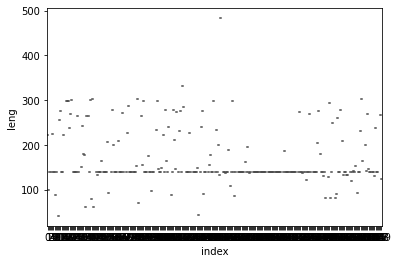

In [50]:
import seaborn as sns
leng = []
index = []
for i in range(len(text)):
        leng.append(len(text.text[i]))
        index.append(i)
text_length = pd.DataFrame(leng)
text_length['index'] = index
text_length.columns = ['leng', 'index']
sns.violinplot(y = text_length['leng'], x = text_length['index'])

<AxesSubplot:>

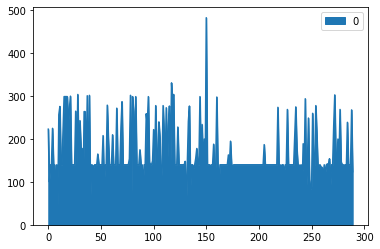

In [28]:
text_length.plot.area()

C:\Users\Jonas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


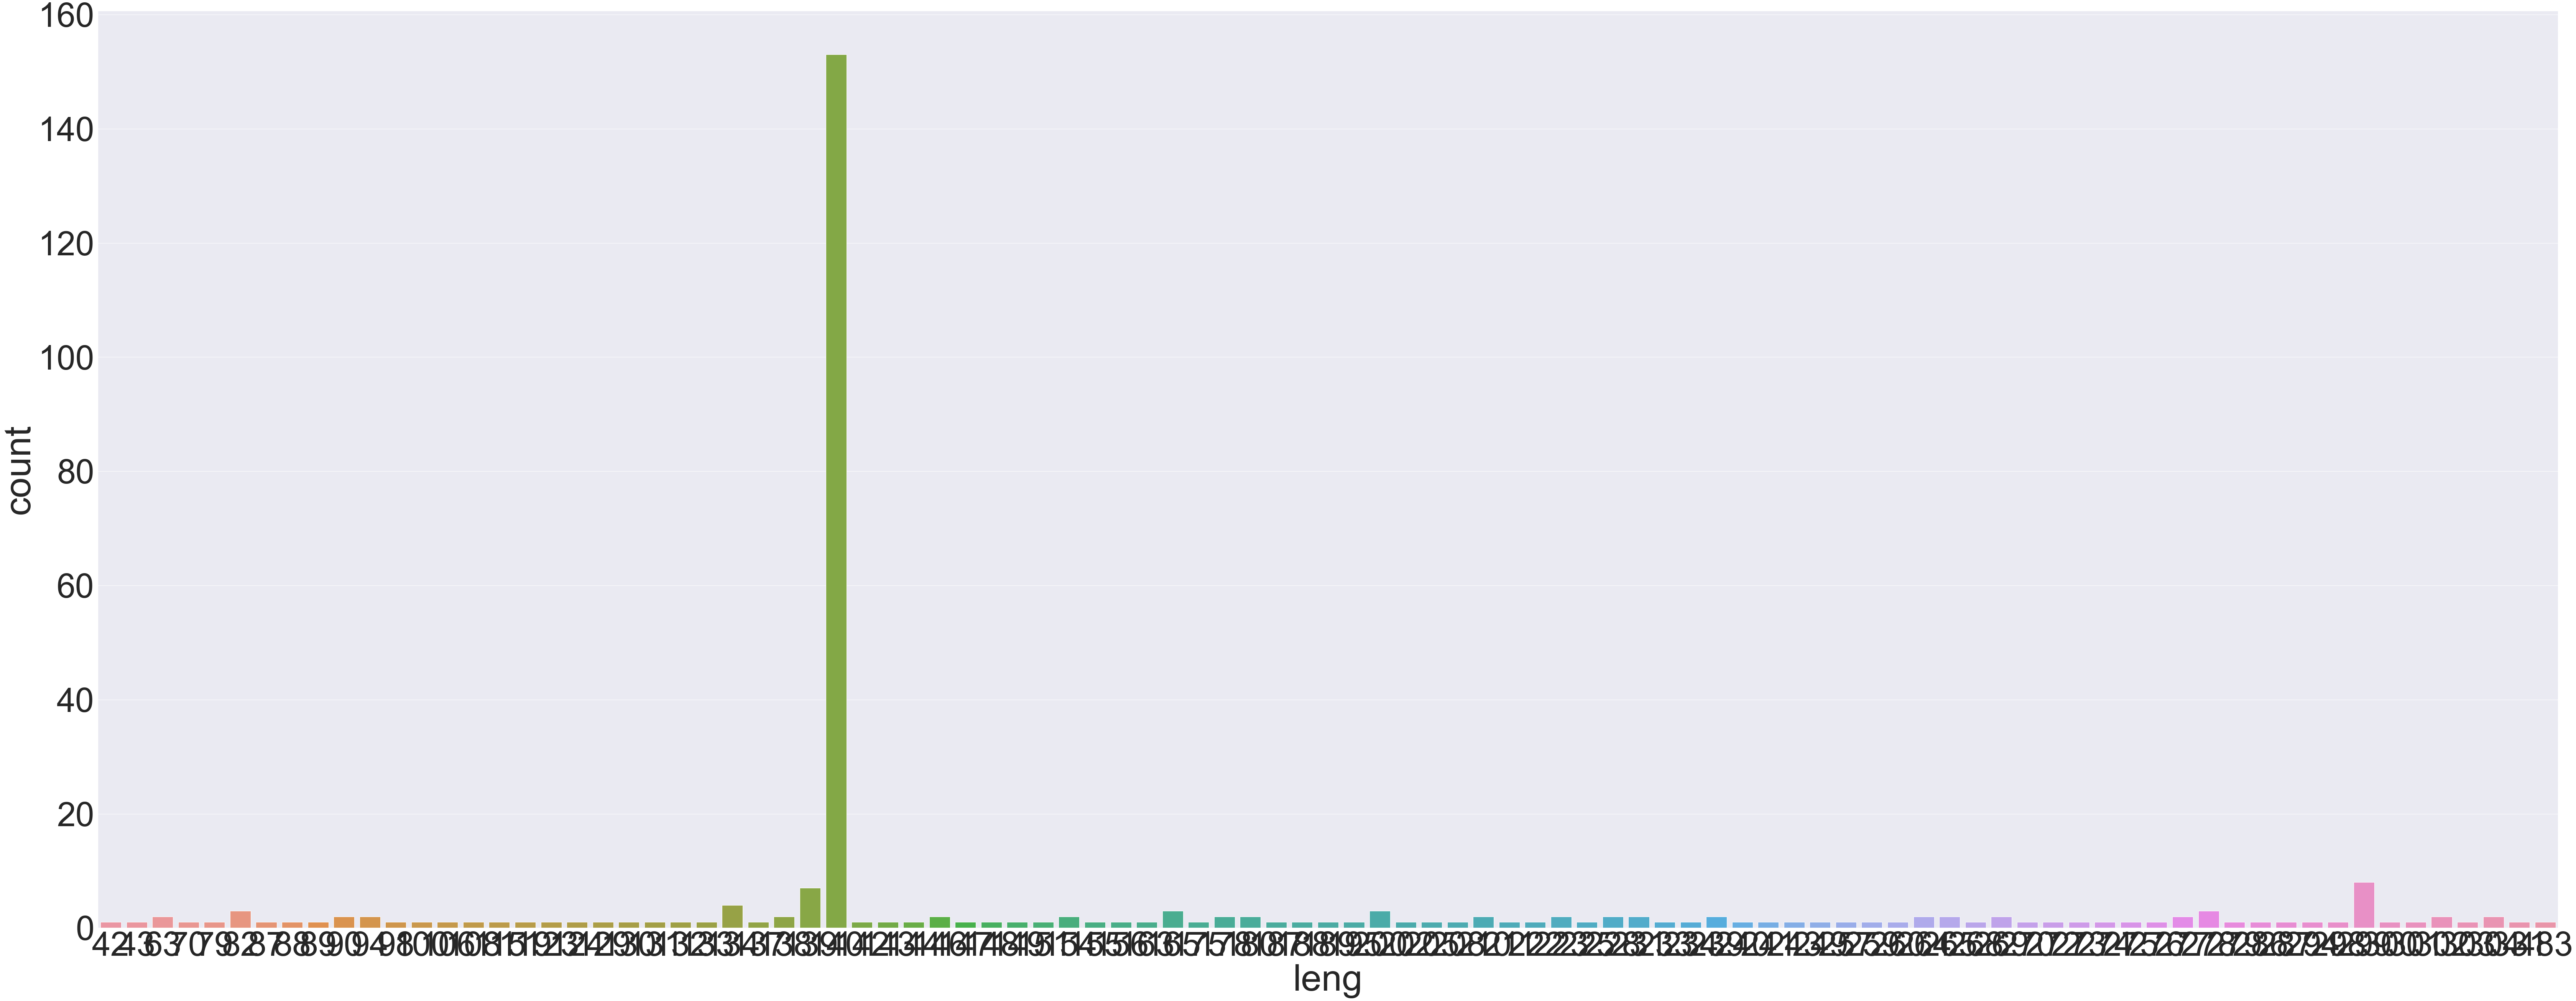

In [64]:
sns.countplot(text_length['leng'])
sns.set(rc={'figure.figsize':(115,44)})
sns.set(font_scale = 6)


#Find Duplicates

In [67]:
text_length['leng'].mean()

166.82758620689654